# Food Map

# Summary

# Motivation

# Imported Libraries (Markdown so that I can get the proper libraries in each section

# For Webscraping
import requests
from bs4 import BeautifulSoup
import re

In [1]:
from src.all_functions import *
from src.communities.communities import *

In [2]:
import _pickle as pickle
#Python Libraries for Mongos Database
import pymongo
from pymongo import MongoClient

In [3]:
from collections import Counter, defaultdict, OrderedDict
import itertools
import operator
from operator import itemgetter

In [4]:
import networkx as nx
import pandas as pd

In [5]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [6]:
import matplotlib.pyplot as plt

# Webscraping FlavorDB

In [7]:
import requests
from bs4 import BeautifulSoup
import re

In [8]:
pg_num = 10 #https://cosylab.iiitd.edu.in/flavordb/entity_details?id=10
#Request each ingredient page using pg_num variable
flavor_db_webpage =requests.get('https://cosylab.iiitd.edu.in/flavordb/entity_details?id={}'.format(pg_num))

#Soup object accesses the HTML of the Request object
soup = BeautifulSoup(flavor_db_webpage.text, 'html.parser')

#Scrape the ingredient name
ingredient_name = str(soup.find('h1', class_='text-primary text-capitalize').text).strip()

#Scrape the category name
category_name = str(soup.find('span', class_='text-capitalize').text).strip()

#Acess the table (https://stackoverflow.com/questions/23377533/python-beautifulsoup-parsing-table)
molecule_table = soup.find('table', id= 'molecules')
table_body = molecule_table.find('tbody')

#initiating a list for each molecule variable    
list_molecule_names = []
list_molecule_id = []
list_molecule_flavor = []

#Access every row in the table 
for row in table_body.find_all('tr'):
    #Access molecule name, id, and flavor in each row
    molecule_name = row.findAll('td')[0].text.strip()
    molecule_id = row.findAll('td')[1].text.strip()
    molecule_flavor = row.findAll('td')[2].text.strip().split(",")
    list_molecule_names.append(molecule_name)
    list_molecule_id.append(molecule_id)
    list_molecule_flavor.append(molecule_flavor)


print(ingredient_name)
print(category_name)
print(list_molecule_names)

Bantu Beer
Beverage Alcoholic
['1-octanol', 'Phenethyl acetate', 'Pentanal', 'Propionaldehyde', '1-Phenyl-1-propanol', '2-Methylbutyl Acetate', 'dimethyl sulfide', 'benzaldehyde', '2-Acetylpyridine', 'Methyl tetradecanoate', '2-Methyl-1-propanol', 'Isobutyl Acetate', 'Oxirane']


# Webscraping Recipe Puppy API

In [9]:
import requests
from bs4 import BeautifulSoup
import re

In [10]:
ingredient = "tuna" #http://www.recipepuppy.com/?i=tuna&q= 
ing_for_url = "+".join(ingredient.split()).lower()
ingredient_name = ingredient.strip().lower()

In [11]:
url = "http://www.recipepuppy.com/?i={}&q={}".format(ing_for_url, ing_for_url)
recipe_puppy_page = requests.get(url)
soup = BeautifulSoup(recipe_puppy_page.text, 'html.parser')

In [12]:
for result in soup.findAll('div', class_ = "result"):
    result_h3 = result.find('h3')

    #name of the result 
    result_name = result_h3.text.strip()
    # print(result_name)

    #link of the result
    result_link = re.findall(r'\"(.+?)\"', str(result_h3))[0].strip()
    # print(result_link)

    #a list of all the ingredients in a recipe
    result_ing_list = [ingredient_name]
    for recipe_ing in result.find('div', class_ = "ings").findAll('a'):
        recipe_ing_name = recipe_ing.text.strip("+").strip()
        result_ing_list.append(recipe_ing_name)
    result_ing_list.sort()

    print(ingredient_name)
    print(result_name)
    print(result_link)
    print(result_ing_list)
    break

tuna
Carpaccio Of Tuna With Seared Tuna Cube And Tuna Tartar Recipe
http://cookeatshare.com/recipes/carpaccio-of-tuna-with-seared-tuna-cube-and-tuna-tartar-100762
['avocado', 'blood orange', 'chips', 'chives', 'cornmeal', 'cracked black pepper', 'cucumber', 'ginger', 'hot sauce', 'lemon juice', 'mango', 'mint', 'olive oil', 'parsley', 'poppy seeds', 'salt', 'shallot', 'tuna', 'vegetable oil', 'watercress']


# Flavor DB

In [13]:
import _pickle as pickle
import pandas as pd

In [14]:
pickle_in = open("./data/pandas/flavorDB_pandas.pickle","rb")

#Getting the dictionary from the pickle
flavorDB = pickle.load(pickle_in)

In [15]:
flavorDB.head()

,_id,category,flavor_of_molecules,ingredient,molecule_IDs,molecules,set_molecules,set_molecules_ID,molecule_quantity
0,5ca27b8f13218a1eabac63d6,Animal Product,"[[faint], [very strong, mothball, animal, f...",egg,"[6322, 6736, 31252, 7909, 7284, 7501, 9609, 12...","[L-arginine, 3-Methylindole, 2,5-Dimethylpyraz...","{4-Methylthiazole, 3-Methylindole, octanoic ac...","{957, 11552, 12748, 7501, 247, 16666, 644104, ...",55
46,5ca27bd113218a1eabac6404,Beverage Caffeinated,"[[solvent, toluene, woody, spicy], [balsami...",coffee,"[7520, 7501, 7284, 7363, 7150, 10448, 61260, 6...","[Thioanisole, Styrene, 2-Methylbutyraldehyde, ...","{3-Methyl-2-Cyclohexen-1-One, 4-Methylthiazole...","{1146, 32065, 18522, 10430, 61665, 26808, 6437...",269
47,5ca27bd213218a1eabac6405,Beverage Caffeinated,"[[coconut, wax, fat, waxy, fatty, earthy,...",mate,"[8193, 8163, 8063, 61041, 9862, 5283321, 8180,...","[1-Dodecanol, 2-Undecanone, Pentanal, Safranal...","{2-Methyltetrahydrofuran-3-One, 3,3-Dimethylac...","{5282108, 17739, 8051, 18522, 6433214, 3893, 5...",51
48,5ca27bd313218a1eabac6406,Beverage Caffeinated,"[[roasted, onion, sulfury, scallion, roast...",black tea,"[526624, 31209, 22873, 7501, 6989, 5352461, 53...","[Bis(2-methyl-3-furyl)disulfide, 122-40-7, Hex...","{cis-2-Hexen-1-ol, Dimethyl trisulfide, 3-Meth...","{22873, 5352461, 26808, 14514, 529481, 7921, 3...",85
49,5ca27bd513218a1eabac6407,Beverage Caffeinated,"[[lilac, hawthorn], [geranium, phenolic, gr...",green tea,"[7148, 7583, 14505, 526624, 323, 61041, 535254...","[Propiophenone, Diphenyl oxide, 2-Acetylfuran,...","{Nerolidol, 23747-48-0, 1125-21-9, Octyl aceta...","{957, 32065, 14296, 8164, 7742, 26808, 5370101...",35


# Recipe Puppy API


In [26]:
import _pickle as pickle
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

### Dropping Recipe Duplicates

In [27]:
pickle_in = open("./data/pandas/mongodb_recipe_puppy_pandas","rb")

#Getting the dictionary from the pickle
recipe_puppy_api = pickle.load(pickle_in)

In [28]:
recipe_puppy_api = recipe_puppy_api.drop_duplicates(subset="recipe_name")

# Filtering out recipes that Only are in FlavorDB

In [31]:
searched_ingredient_list = flavorDB["ingredient"].tolist()

In [32]:
print("Total number of ingredients searched: ", len(searched_ingredient_list))

Total number of ingredients searched:  619


In [33]:
recipe_puppy_api = recipe_puppy_api[recipe_puppy_api["searched_ingredient"].isin(searched_ingredient_list)]

In [34]:
recipe_puppy_api.head()

,_id,recipe_ingredients,recipe_link,recipe_name,searched_ingredient
0,5caa762213218a112b0b979f,"[dashi, egg, egg noodles, mushroom, salt, seas...",http://www.grouprecipes.com/31653/egg-noodles-...,Egg Noodles With Wonton Egg And Veggie Recipe,egg
1,5caa762213218a112b0b97a0,"[egg, water]",http://www.recipezaar.com/Egg-Peeling-for-Egg-...,Egg Peeling for Egg Salad,egg
2,5caa762213218a112b0b97a1,"[black pepper, celery, cucumber, curry powder,...",http://www.recipezaar.com/Curried-Egg-Salad-on...,Curried Egg Salad on a Bed of Greens -- an Egg...,egg
3,5caa762213218a112b0b97a2,"[baking powder, butter, egg, green onion, rame...",http://www.recipezaar.com/Ramen-Noodle-Egg-Foo...,Ramen Noodle Egg Foo Yung,egg
4,5caa762213218a112b0b97a3,"[bacon, black pepper, cheese, egg, salt]",http://www.recipezaar.com/Bacon-and-Egg-Cups-1...,Bacon and Egg Cups,egg


In [35]:
print("number of recipes: ", recipe_puppy_api.shape[0])

number of recipes:  88078


In [36]:
ingredient_list = []
for _, rows in recipe_puppy_api.iterrows():
    for ing in rows["recipe_ingredients"]:
        ingredient_list.append(ing)

In [40]:
print("Number of ingredients in Recipe Puppy API: ", len(ingredient_list))

Number of ingredients in Recipe Puppy API:  630803


In [41]:
Counter(ingredient_list)

Counter({'dashi': 13,
         'egg': 976,
         'egg noodles': 203,
         'mushroom': 3058,
         'salt': 31979,
         'seasoning': 466,
         'shallot': 2304,
         'vegetable oil': 8937,
         'white pepper': 1516,
         'water': 13316,
         'black pepper': 16464,
         'celery': 4228,
         'cucumber': 1744,
         'curry powder': 1045,
         'dried currant': 12,
         'ginger': 3978,
         'green onion': 4823,
         'green pepper': 2235,
         'hot sauce': 1277,
         'lemon': 3152,
         'mayonnaise': 3226,
         'olives': 791,
         'red onions': 2464,
         'salad greens': 1091,
         'walnut': 2621,
         'baking powder': 3471,
         'butter': 21543,
         'ramen noodles': 22,
         'soy sauce': 3201,
         'bacon': 2776,
         'cheese': 1634,
         'dijon mustard': 2339,
         'paprika': 1778,
         'sour cream': 3278,
         'sweet pickle relish': 146,
         'wheat bread': 25

In [42]:
print("Number of unique ingredients in Recipe Puppy API: ", len(Counter(ingredient_list)))

Number of unique ingredients in Recipe Puppy API:  1637


In [44]:
ingredient_counter = pd.DataFrame.from_dict(Counter(ingredient_list), orient='index').reset_index()
ingredient_counter = ingredient_counter.rename(columns= {"index": "ingredient", 0: "quantity"})
ingredient_counter = ingredient_counter.set_index('ingredient')
ingredient_counter = ingredient_counter.sort_values(by= ["quantity"], ascending= False)

In [45]:
ingredient_counter.head(100)

,quantity
ingredient,
salt,31979
butter,21543
sugar,17839
black pepper,16464
garlic,16398
olive oil,15947
eggs,13802
flour,13754
onions,13646


In [30]:
ingredient_counter["quantity"].describe()

count     1639.000000
mean       572.751678
std       2371.747167
min          1.000000
25%         17.000000
50%         57.000000
75%        250.500000
max      47525.000000
Name: quantity, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

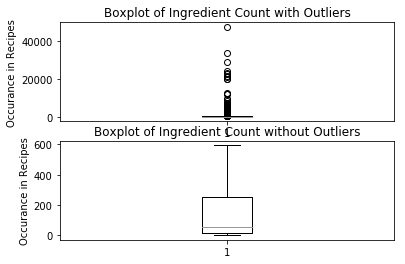

In [31]:
fig, axs = plt.subplots(2)
axs[0].boxplot(ingredient_counter["quantity"])
axs[0].set_title('Boxplot of Ingredient Count with Outliers')
axs[0].set_ylabel("Occurance in Recipes")

axs[1].boxplot(ingredient_counter["quantity"], 0, '')
axs[1].set_title('Boxplot of Ingredient Count without Outliers')
axs[1].set_ylabel("Occurance in Recipes")

plt.show

In [32]:
stop_ingredients = ['salt', 'sugar', 'flour', 'baking powder', 'baking soda', "cornstarch", 'nonstick cooking spray']

In [33]:
stop_ingredients

['salt',
 'sugar',
 'flour',
 'baking powder',
 'baking soda',
 'cornstarch',
 'nonstick cooking spray']

In [34]:
ingredient_counter = ingredient_counter.drop(stop_ingredients)
ingredient_counter.head()

,quantity
ingredient,
butter,33886
black pepper,23980
garlic,23054
olive oil,22736
eggs,21501


In [35]:
unique_list_of_recipe_puppy_ingredients = list(set(ingredient_list))

In [36]:
standarize_ingredient_dict = {}
for ing in unique_list_of_recipe_puppy_ingredients:
    king_tup = [ing, 0]
    for ing_2 in searched_ingredient_list:
        fuzz_ratio = fuzz.ratio(ing, ing_2)
        if  fuzz_ratio > king_tup[1]:
            king_tup = [ing_2, fuzz_ratio]
    if king_tup[1] >= 85:
        standarize_ingredient_dict[ing] = king_tup[0]

In [37]:
standarize_ingredient_dict

{'vinegar': 'vinegar',
 'hazelnuts': 'hazelnut',
 'onion': 'onion',
 'oyster': 'oyster',
 'waterchestnuts': 'water chestnut',
 'lamb': 'lamb',
 'milk': 'milk',
 'anise': 'anise',
 'kale': 'kale',
 'grapefruit': 'grapefruit',
 'romano cheese': 'romano cheese',
 'persimmons': 'persimmon',
 'prickly pear': 'prickly pear',
 'feta cheese': 'feta cheese',
 'pistachios': 'pistachio',
 'peanuts': 'peanut',
 'orange': 'orange',
 'eggplant': 'eggplant',
 'chanterelles': 'chanterelle',
 'okra': 'okra',
 'yogurt': 'yogurt',
 'turkey': 'turkey',
 'mexican oregano': 'mexican oregano',
 'poppy seed': 'poppy seed',
 'ginkgo nuts': 'ginkgo nuts',
 'skimmed milk': 'skimmed milk',
 'butternut squash': 'butternut squash',
 'cocoa powder': 'cocoa powder',
 'spearmint': 'spearmint',
 'ham': 'ham',
 'sockeye salmon': 'sockeye salmon',
 'sweet potato': 'sweet potato',
 'raspberry': 'raspberry',
 'chives': 'chive',
 'milk powder': 'milk powder',
 'almond': 'almond',
 'bartlett pear': 'bartlett pear',
 'strawbe

In [38]:
standarize_ingredient_dict_rest = {}
for ing in unique_list_of_recipe_puppy_ingredients:
    king_tup = [ing, 0]
    for ing_2 in searched_ingredient_list:
        fuzz_ratio = fuzz.ratio(ing, ing_2)
        if  fuzz_ratio > king_tup[1]:
            king_tup = [ing_2, fuzz_ratio]
        standarize_ingredient_dict_rest[ing] = (king_tup[0], king_tup[1])

In [39]:
standarize_ingredient_dict_rest

{'dried fig': ('red rice', 59),
 'chevre cheese': ('cheddar cheese', 81),
 'cream of tartar': ('rainbow trout', 50),
 'vinegar': ('vinegar', 100),
 'lemon zest': ('lemon sole', 70),
 'triple sec': ('striped bass', 64),
 'queso blanco': ('european anchovy', 50),
 'white fish fillets': ('whitefish', 67),
 'liquor': ('liqourice', 67),
 'hazelnuts': ('hazelnut', 94),
 'vanilla pudding mix': ('vanilla', 54),
 'pizza': ('spinach', 50),
 'yellow bell pepper': ('white pepper', 60),
 'sour cream': ('sour cherry', 67),
 'pie crust': ('pili nut', 59),
 'baked beans': ('black bear', 67),
 'lavender': ('coriander', 59),
 'shaoxing wine': ('tangerine', 55),
 'onion': ('onion', 100),
 'pasta sauce': ('soybean sauce', 67),
 'english peas': ('green beans', 52),
 'breadcrumbs': ('breadfruit', 67),
 'pimento stuffed olive': ('painted comber', 51),
 'fruit pectin': ('jackfruit', 48),
 'tahini': ('rapini', 67),
 'riesling': ('raisin', 71),
 'soup mix': ('sheep milk', 56),
 'enchilada sauce': ('soybean sauc

(array([  4.,   4.,  12.,  12.,  49.,  77.,  70., 115.,  90., 116., 150.,
         71., 229.,  26.,  40.,  72.,  73.,  59.,  36.,  28.,  23.,  11.,
         11.,   4.,   3.,  15.,   7.,  12.,   2., 218.]),
 array([ 42.        ,  43.93333333,  45.86666667,  47.8       ,
         49.73333333,  51.66666667,  53.6       ,  55.53333333,
         57.46666667,  59.4       ,  61.33333333,  63.26666667,
         65.2       ,  67.13333333,  69.06666667,  71.        ,
         72.93333333,  74.86666667,  76.8       ,  78.73333333,
         80.66666667,  82.6       ,  84.53333333,  86.46666667,
         88.4       ,  90.33333333,  92.26666667,  94.2       ,
         96.13333333,  98.06666667, 100.        ]),
 <a list of 30 Patch objects>)

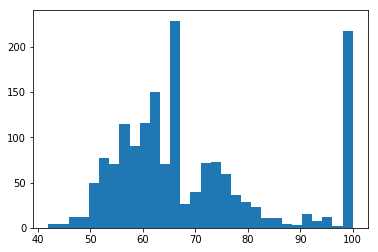

In [40]:
plt.hist([v[1] for k,v in standarize_ingredient_dict_rest.items()], bins=30)

In [41]:
def cleaner(row):
    ingredient_list = row["recipe_ingredients"]
    ingredient_list = [standarize_ingredient_dict[ing] for ing in ingredient_list if ing in standarize_ingredient_dict and ing not in ["garlic", "onion"]]
    return ingredient_list

In [42]:
recipe_puppy_api["recipe_ingredients"] = recipe_puppy_api.apply(lambda row: cleaner(row), axis=1)

In [46]:
recipe_puppy_api.head()

,_id,recipe_ingredients,recipe_link,recipe_name,searched_ingredient
0,5caa762213218a112b0b979f,"[dashi, egg, egg noodles, mushroom, salt, seas...",http://www.grouprecipes.com/31653/egg-noodles-...,Egg Noodles With Wonton Egg And Veggie Recipe,egg
1,5caa762213218a112b0b97a0,"[egg, water]",http://www.recipezaar.com/Egg-Peeling-for-Egg-...,Egg Peeling for Egg Salad,egg
2,5caa762213218a112b0b97a1,"[black pepper, celery, cucumber, curry powder,...",http://www.recipezaar.com/Curried-Egg-Salad-on...,Curried Egg Salad on a Bed of Greens -- an Egg...,egg
3,5caa762213218a112b0b97a2,"[baking powder, butter, egg, green onion, rame...",http://www.recipezaar.com/Ramen-Noodle-Egg-Foo...,Ramen Noodle Egg Foo Yung,egg
4,5caa762213218a112b0b97a3,"[bacon, black pepper, cheese, egg, salt]",http://www.recipezaar.com/Bacon-and-Egg-Cups-1...,Bacon and Egg Cups,egg


# Making a Graph

In [44]:
sample_recipes = recipe_puppy_api.sample(n=5, random_state=10)

In [45]:
sample_recipes

,_id,recipe_ingredients,recipe_link,recipe_name,searched_ingredient
122230,5caa83da13218a112b0d7515,"[celery, cream, egg, mustard, onion, potato, w...",http://www.recipezaar.com/Nans-Classic-Mustard...,Nan's Classic Mustard Potato Salad,potato
133391,5caa852c13218a112b0da0ae,[summer savory],http://www.epicurious.com/recipes/food/views/G...,Grilled Country Ribs with Summer Savory Mustar...,summer savory
125041,5caa842c13218a112b0d8010,"[eggplant, parsley]","http://www.cooks.com/rec/view/0,191,152178-251...",Eggplant And Tahini,eggplant
169299,5caa896a13218a112b0e2cf2,"[semolina, squid]",http://www.bbc.co.uk/food/recipes/database/cri...,Crispy squid with garlic mayonnaise,squid
25815,5caa78f813218a112b0bfc76,"[blue cheese, onion]",http://cookeatshare.com/recipes/blue-cheese-sa...,Blue Cheese Salad Dressing Recipe,blue cheese


In [46]:
sample_recipes["recipe_ingredients"][122230]

['celery', 'cream', 'egg', 'mustard', 'onion', 'potato', 'white pepper']

In [47]:
sample_graph = graph_based_on_shared_recipe_creator(sample_recipes)

In [48]:
sample_graph.edges(data = True)

EdgeDataView([('white pepper', 'onion', {'weight': 1, 'pmi': 0.3010299956639812, 'iou': 0.3333333333333333}), ('white pepper', 'mustard', {'weight': 1, 'pmi': 0.6020599913279624, 'iou': 0.5}), ('white pepper', 'celery', {'weight': 1, 'pmi': 0.6020599913279624, 'iou': 0.5}), ('white pepper', 'cream', {'weight': 1, 'pmi': 0.6020599913279624, 'iou': 0.5}), ('white pepper', 'egg', {'weight': 1, 'pmi': 0.6020599913279624, 'iou': 0.5}), ('white pepper', 'potato', {'weight': 1, 'pmi': 0.6020599913279624, 'iou': 0.5}), ('onion', 'mustard', {'weight': 1, 'pmi': 0.3010299956639812, 'iou': 0.3333333333333333}), ('onion', 'celery', {'weight': 1, 'pmi': 0.3010299956639812, 'iou': 0.3333333333333333}), ('onion', 'cream', {'weight': 1, 'pmi': 0.3010299956639812, 'iou': 0.3333333333333333}), ('onion', 'egg', {'weight': 1, 'pmi': 0.3010299956639812, 'iou': 0.3333333333333333}), ('onion', 'potato', {'weight': 1, 'pmi': 0.3010299956639812, 'iou': 0.3333333333333333}), ('onion', 'blue cheese', {'weight': 

In [49]:
nx.pagerank(sample_graph, alpha=0.9)


{'white pepper': 0.08926567521905736,
 'onion': 0.10875582578455398,
 'mustard': 0.08926567521905736,
 'celery': 0.08926567521905736,
 'cream': 0.08926567521905736,
 'egg': 0.08926567521905736,
 'potato': 0.08926567521905736,
 'eggplant': 0.08333333333333333,
 'parsley': 0.08333333333333333,
 'semolina': 0.08333333333333333,
 'squid': 0.08333333333333333,
 'blue cheese': 0.02231678956776844}

In [50]:
nx.betweenness_centrality(sample_graph)

{'white pepper': 0.0,
 'onion': 0.10909090909090909,
 'mustard': 0.0,
 'celery': 0.0,
 'cream': 0.0,
 'egg': 0.0,
 'potato': 0.0,
 'eggplant': 0.0,
 'parsley': 0.0,
 'semolina': 0.0,
 'squid': 0.0,
 'blue cheese': 0.0}

In [51]:
recipe_graph = graph_based_on_shared_recipe_creator(recipe_puppy_api)

In [52]:
recipe_graph["flour"]

AtlasView({'egg': {'weight': 7336, 'pmi': 0.4117144655118662, 'iou': 0.24581155341107092}, 'butter': {'weight': 7706, 'pmi': 0.2588725842251223, 'iou': 0.20611993794468517}, 'cumin': {'weight': 199, 'pmi': -0.4027182726627315, 'iou': 0.011525541526699873}, 'basil': {'weight': 259, 'pmi': -0.40256073284303046, 'iou': 0.014325221238938052}, 'evaporated milk': {'weight': 154, 'pmi': 0.10638105316302991, 'iou': 0.01012491781722551}, 'cheddar cheese': {'weight': 722, 'pmi': 0.08818736284934345, 'iou': 0.040721940214326}, 'milk': {'weight': 3178, 'pmi': 0.3436238867681837, 'iou': 0.14247287725275712}, 'cheese': {'weight': 256, 'pmi': -0.023889103014009313, 'iou': 0.015984015984015984}, 'jalapeno': {'weight': 217, 'pmi': -0.15268945416856508, 'iou': 0.013378545006165228}, 'onion': {'weight': 1712, 'pmi': -0.19315485045878644, 'iou': 0.05919778699861687}, 'tomato': {'weight': 365, 'pmi': -0.4653506195959777, 'iou': 0.017988270661869796}, 'buttermilk': {'weight': 963, 'pmi': 0.518715566973275, 

# EDA with Graphs

In [ ]:
dict_ingredient_quanitities = {}
for node in recipe_graph.nodes(data= True):
    ingredient_name = node[0]
    ingredient_quantity = node[1]['quantity']
    dict_ingredient_quanitities[ingredient_name] = ingredient_quantity

In [ ]:
sorted_dict_ingredient_quanitities = sorted(dict_ingredient_quanitities.items(), key=lambda kv: kv[1], reverse=True)
sorted_dict_ingredient_quanitities

In [ ]:
#to dictionary to numpy array and then getting log 10
dict_sorted_dict_ingredient_quanitities = OrderedDict(sorted_dict_ingredient_quanitities)
vals = np.fromiter(dict_sorted_dict_ingredient_quanitities.values(), dtype=float)
np.log10(vals)

In [ ]:
plt.scatter(np.arange(len(sorted_dict_ingredient_quanitities)), np.log10(vals))

In [ ]:
plt.scatter(np.log10(np.arange(len(sorted_dict_ingredient_quanitities))), np.log10(vals))

# Measures of Centrality

In [ ]:
recipe_degree_centrality = nx.degree_centrality(recipe_graph)

In [ ]:
sorted_recipe_degree_centrality = sorted(recipe_degree_centrality.items(), key=lambda kv: kv[1], reverse=True)

In [ ]:
dict_sorted_recipe_degree_centrality = OrderedDict(sorted_recipe_degree_centrality)
dict_sorted_recipe_degree_centrality

# Betweenness Centrality

In [ ]:
recipe_betweenness_centrality = nx.betweenness_centrality(recipe_graph)

In [ ]:
sorted_recipe_betweenness_centrality = sorted(recipe_betweenness_centrality.items(), key=lambda kv: kv[1], reverse=True)

In [ ]:
dict_sorted_recipe_betweenness_centrality = OrderedDict(sorted_recipe_betweenness_centrality)
dict_sorted_recipe_betweenness_centrality

# Page Rank Centrality

In [ ]:
recipe_page_rank_centrality = nx.pagerank(recipe_graph)

In [ ]:
sorted_page_rank_centrality = sorted(recipe_page_rank_centrality.items(), key=lambda kv: kv[1], reverse=True)

In [ ]:
dict_sorted_recipe_page_rank_centrality = OrderedDict(sorted_page_rank_centrality)
dict_sorted_recipe_page_rank_centrality

# Eigen Vector Centrality

In [ ]:
recipe_eigenvector_centrality = nx.eigenvector_centrality(recipe_graph, max_iter=10000)

In [ ]:
sorted_eigenvector_centrality = sorted(recipe_eigenvector_centrality.items(), key=lambda kv: kv[1], reverse=True)

In [ ]:
dict_sorted_eigenvector_centrality = OrderedDict(sorted_page_rank_centrality)
dict_sorted_eigenvector_centrality

# Compliments

In [97]:
list_of_edges_quant25 = []
for edge in recipe_graph.edges(data= True):
    ingredient_1 = edge[0]
    ingredient_2 = edge[1]
    quantity_ing1 = recipe_graph.node[ingredient_1]['quantity']
    quantity_ing2 = recipe_graph.node[ingredient_2]['quantity']
    
    if quantity_ing1 >= 25 and quantity_ing2 >= 25:
       list_of_edges_quant25.append(edge)


In [ ]:
for a, b, data in sorted(list_of_edges_quant25, key=lambda x: x[2]['weight'], reverse= True):
    print('{a} {b} {w}'.format(a=a, b=b, w=data['weight']))

In [98]:
for a, b, data in sorted(list_of_edges_quant25, key=lambda x: x[2]['pmi'], reverse= True):
    print('{a} {b} {w}'.format(a=a, b=b, w=data['pmi']))

turnip rutabaga 2.230544633049769
fenugreek mustard oil 2.219254552067457
parsnip rutabaga 1.8860637475002526
heart of palm chayote 1.871227993727252
turmeric fenugreek 1.7926993315468236
ghee semolina 1.7794625303446643
goat cheese goat milk 1.757631717048645
brussels sprout chestnut 1.7530226397779205
turmeric mustard oil 1.6928449378919859
ghee fenugreek 1.5857860964878703
brussels sprout amaranth 1.5701979980632708
dates brazil nut 1.5153493300559258
fish whitefish 1.5080500913144264
peanut butter peanut oil 1.507479216658481
fenugreek amaranth 1.5032512084326577
corn corn oil 1.4791631320763599
passionfruit mango 1.471011817688015
chestnut quail 1.454007935349265
amaranth fig 1.4513334091671641
cardamom ghee 1.4447007239290133
chervil beetroot 1.4443322718140117
macadamia nut ginkgo nuts 1.4282223901966782
summer savory albacore tuna 1.4107827813039848
wasabi yellowfin tuna 1.4074243040608634
turnip parsnip 1.4073853219409516
turmeric ghee 1.4046101404684341
coriander fenugreek 1.

pork rabbit 0.22751293762118022
yogurt grapefruit 0.2275064208905121
corn goat milk 0.22750356985159353
cherry tomato summer savory 0.22715710435104589
tomato sweetcorn 0.22709252378447625
leek rabbit 0.22694187313139863
jalapeno buttermilk 0.22691380735626454
rice pink salmon 0.22689821604263752
white pepper romano cheese 0.22675873971872226
chocolate soy yogurt 0.22671739769802737
tarragon caviar 0.22650549960479802
tarragon saffron 0.22650549960479802
orange winter squash 0.22635660956680467
onion black bear 0.22621420846845863
yam tangerine 0.2262034120227846
fig prickly pear 0.22615671620188021
cinnamon fenugreek 0.2261123598220407
mushroom summer savory 0.22609135048638604
mushroom pork 0.22609135048638604
asparagus lemon verbena 0.2260616919779528
broccoli quinoa 0.2258517603323487
parmesan cheese marjoram 0.2258312820249421
pepper marjoram 0.22547669387048894
cauliflower dill 0.225440564675715
banana mandarin orange 0.22541026508778778
onion monkfish 0.2252655431851351
cornbrea

grape provolone cheese -0.07291944530561277
allspice cashew nut -0.07307810768211134
butter shrimp -0.07314983524833608
fish cisco -0.0734233692317586
wheat hazelnut -0.07355452790882691
mushroom crab -0.07359199454232315
honey fennel -0.07365978309256883
cheese thyme -0.07377648699250104
flour lemon verbena -0.07380148050072487
nutmeg milk powder -0.07381806383347185
mozzarella cheese rosemary -0.07388511139993546
buttermilk plum -0.07401140015860079
clove lime -0.07402390461853166
carrot red rice -0.07404238182730558
rice meat -0.07413177962134362
almond chayote -0.07416763751864051
honey bulgur -0.07417855020410657
butter salmon -0.07424771346463042
shallot cherry -0.07430184449760494
milk evaporated milk -0.0744902254352235
mushroom chive -0.07464550005549427
avocado pear -0.07464722501724273
hazelnut pumpkin -0.07480790390692402
chicken gruyere cheese -0.07481450631859941
lemon apricot -0.07495198391084289
cheese chestnut -0.07508801559416767
lemon ginkgo nuts -0.07517710416568225

feta cheese roquefort cheese -0.4310868977908485
roquefort cheese lobster -0.4310868977908485
nutmeg corn -0.43118089638938173
pineapple basmati rice -0.43119791218675907
cumin marjoram -0.43155707541670774
nuts yellowfin tuna -0.43156159388555704
coriander apple cider vinegar -0.43157323214943905
shrimp ginkgo nuts -0.43160413560544447
walnut coriander -0.43168152151090355
rice corn grits -0.4317370682914899
ginger cherry tomato -0.4317597887466822
radish wild rice -0.43184493119304196
horseradish grapefruit -0.4318510886472562
turkey peanut butter -0.43193420573571595
pecans mango -0.43195041684473323
milk pineapple -0.4320961430796593
yogurt cherry -0.4321855124950822
cottage cheese cocoa powder -0.4322183255004785
banana prickly pear -0.4323249506494268
swiss cheese bartlett pear -0.43238030338427813
swiss cheese tangerine -0.43238030338427813
butter cabbage -0.43243933852636673
cream mozzarella cheese -0.43250874921534543
white pepper peanut -0.43274094843437394
egg shrimp -0.4327

walnut shrimp -1.0082068186094766
chive banana -1.0084874587952086
peanut butter vanilla -1.0085282607856554
turkey lemon verbena -1.0087740796484348
butter soy yogurt -1.0088034380865571
blue cheese wild rice -1.0092631280334123
cherry tomato prickly pear -1.009300599023927
black bear pecans -1.0093782460024625
lemon evaporated milk -1.010639285641954
carrot coffee -1.010766487343445
shallot nuts -1.01137950987351
pineapple gruyere cheese -1.0114781291914794
cocoa powder lime -1.011692402651606
mozzarella cheese popcorn -1.01213951545513
buttermilk lamb -1.0134969224768722
jalapeno rhubarb -1.0143479833042268
mustard cocoa powder -1.015065842651124
shrimp pecans -1.0154865672585143
flour avocado -1.0164018495180813
skimmed milk wild rice -1.0165623667749117
potato poppy seed -1.0168890701640978
peanut butter meat -1.0169317583322828
cocoa powder romano cheese -1.017077400123693
potato oats -1.0172311690253502
potato nuts -1.0172311690253502
almond corn grits -1.0177636063205857
peanut

In [ ]:
for a, b, data in sorted(list_of_edges_quant25, key=lambda x: x[2]['iou'], reverse= True):
    print('{a} {b} {w}'.format(a=a, b=b, w=data['iou']))

# Substitutes

p(x)

R p x

In [ ]:
p = "turnip" 
x = "onion"
q = "rutabaga"
rpx = recipe_graph[p][x]["weight"]
rpx

In [ ]:
recipe_graph.get_edge_data(p, "rutabaga")

In [ ]:
recipe_graph.edges(p, data = True)

R P Y summation for all ingredients

In [ ]:
sum([data["weight"] for a,b, data in recipe_graph.edges(p, data = True)])

In [ ]:
recipe_graph.node[p]

In [ ]:
def bhattacharyya_quotient(ingredient_1 = "egg", x = "flour"):
    
    if recipe_graph.get_edge_data(ingredient_1, x) == None:
        ing_1_quotient = 0
    
    else:
        ing_1_numerator = recipe_graph.get_edge_data(ingredient_1, x)["weight"]
        ing_1_denominator = sum([data["weight"] for _, __, data in recipe_graph.edges(ingredient_1, data = True)])
        ing_1_quotient = ing_1_numerator / ing_1_denominator 
    
    return ing_1_quotient

In [ ]:
def bhattacharyya_distance(ingredient_1 = "pecans", ingredient_2 = "walnut", graph= recipe_graph):
    result = 0 
    for iter_ing in graph.nodes():
        quot_1 = bhattacharyya_quotient(ingredient_1, iter_ing)
        quot_2 = bhattacharyya_quotient(ingredient_2, iter_ing)
        result += (quot_1 * quot_2) ** 0.5
    return -1 * np.log10(result)

In [ ]:
bhattacharyya_distance()

# Bhattacharyya Distance on every possible combination

In [ ]:
dict_bhattacharry_distance  = {}
for combo in combinations(recipe_graph.nodes(), 2):
#     if recipe_graph.nodes[combo[0]]['quantity'] < 2000 or recipe_graph.nodes[combo[1]]['quantity'] < 2000:
#         continue
    
    dict_bhattacharry_distance[combo] = bhattacharyya_distance(combo[0], combo[1])


In [ ]:
dict_bhattacharry_distance

In [ ]:
sorted_dict_bhattacharry_distance = sorted(dict_bhattacharry_distance.items(), key=lambda kv: kv[1])

In [ ]:
sorted_dict_bhattacharry_distance

In [ ]:
recipe_graph.nodes["egg"]

[(('walnut', 'pecans'), 0.015992631027561786),
 (('milk', 'skimmed milk'), 0.01969130052850979),
 (('cheese', 'cheddar cheese'), 0.020758856383458413),
 (('white pepper', 'chive'), 0.022141242304505232),
 (('walnut', 'almond'), 0.025280848456086302),
 (('parmesan cheese', 'romano cheese'), 0.02654215229680028),
 (('white pepper', 'parsley'), 0.026740686950173915),
 (('white pepper', 'potato'), 0.02743646945584778),
 (('milk', 'evaporated milk'), 0.02788176595653082),
 (('white pepper', 'leek'), 0.02823937284073544),
 (('shallot', 'lemon'), 0.028336436142838588),
 (('chicken', 'turkey'), 0.028716291184999895),
 (('cheese', 'swiss cheese'), 0.028874325568267512),
 (('parsley', 'thyme'), 0.028994108654302433),
 (('winter squash', 'butternut squash'), 0.029137430905819255),
 (('shallot', 'chive'), 0.029637308496894013),
 (('white pepper', 'thyme'), 0.029751848864108747),
 (('mushroom', 'thyme'), 0.029791831961968565),
 (('mushroom', 'parsley'), 0.030373500165506127),
 (('clove', 'allspice'), 0.03042292262524438),
 (('white pepper', 'mushroom'), 0.030581148713462042),
 (('pecans', 'almond'), 0.03061444424266615),
 (('white pepper', 'tarragon'), 0.03092448013271665),
 (('cheese', 'parmesan cheese'), 0.03097950054800081),
 (('sweet potato', 'yam'), 0.031083459937286693),
 (('chicken', 'shrimp'), 0.03163944828548799),
 (('plum', 'apricot'), 0.03191610601043731),
 (('thyme', 'rosemary'), 0.03192963348900025),
 (('rosemary', 'marjoram'), 0.032015391231895396),
 (('honey', 'orange'), 0.03242587283732452),
 (('tomato', 'cherry tomato'), 0.03251036216192002),
 (('milk', 'buttermilk'), 0.032581199941510715),
 (('mushroom', 'celery'), 0.03260822322134255),
 (('thyme', 'marjoram'), 0.03267972185722435),
 (('blackberry', 'raspberry'), 0.03268375657039242),
 (('mushroom', 'marjoram'), 0.03276794109350866),
 (('white pepper', 'shallot'), 0.03281002486134788),
 (('parsley', 'spinach'), 0.03283424944542265),
 (('sage', 'marjoram'), 0.03288480236668147),
 (('cheddar cheese', 'swiss cheese'), 0.032936839941316534),
 (('white pepper', 'pepper'), 0.03295336297563834),
 (('chive', 'asparagus'), 0.03325625315298724),
 (('potato', 'thyme'), 0.033400773432801956),
 (('blue cheese', 'roquefort cheese'), 0.033459643372212744),
 (('mushroom', 'potato'), 0.03349218963433239),
 (('sweet potato', 'butternut squash'), 0.03350297008384161),
 (('plum', 'prickly pear'), 0.03378351962440435),
 (('parsley', 'rosemary'), 0.03378645124424151),
 (('chive', 'parsley'), 0.03383918843398103),
 (('fish', 'lobster'), 0.033897448999353576),
 (('thyme', 'sage'), 0.03400490686563681),
 (('nuts', 'pecans'), 0.03413923134160778),
 (('shallot', 'onion'), 0.03418304412425414),
 (('bartlett pear', 'prickly pear'), 0.03442343692769297),
 (('tarragon', 'thyme'), 0.03473301688667244),
 (('white pepper', 'carrot'), 0.034771981589772696),
 (('chive', 'leek'), 0.03497325857174126),
 (('chive', 'thyme'), 0.035257795536759964),
 (('peach', 'apricot'), 0.035324863062122944),
 (('tarragon', 'fennel'), 0.03537662711802633),
 (('white pepper', 'lemon'), 0.03541562538786783),
 (('basil', 'spinach'), 0.03556194369500145),
 (('parsley', 'marjoram'), 0.035741058390228266),
 (('basil', 'parsley'), 0.03578441613970702),
 (('parsley', 'potato'), 0.03579106315258766),
 (('thyme', 'leek'), 0.03584879821535855),
 (('white pepper', 'cream'), 0.03590153176071061),
 (('white pepper', 'cheese'), 0.03590273051564559),
 (('romano cheese', 'provolone cheese'), 0.0360192006809886),
 (('broccoli', 'spinach'), 0.036096416303985725),
 (('parsnip', 'leek'), 0.03614332173152845),
 (('chive', 'tarragon'), 0.03623835020940512),
 (('parsley', 'leek'), 0.03632654975048029),
 (('basil', 'oregano'), 0.03633453501431125),
 (('currant', 'raisin'), 0.03647031483899562),
 (('shallot', 'parsley'), 0.03648596893049667),
 (('potato', 'leek'), 0.036496273753929574),
 (('spinach', 'asparagus'), 0.03657478175796906),
 (('celery', 'thyme'), 0.03658782392409654),
 (('white pepper', 'asparagus'), 0.03661312805879911),
 (('chicken', 'pork'), 0.03670233327672222),
 (('shallot', 'leek'), 0.03678736441401048),
 (('mushroom', 'carrot'), 0.03686294062840946),
 (('tarragon', 'leek'), 0.03696652586156405),
 (('parsley', 'asparagus'), 0.037042540217930436),
 (('parsley', 'pepper'), 0.03723457036932611),
 (('mozzarella cheese', 'provolone cheese'), 0.0374977488695388),
 (('chive', 'spinach'), 0.03767345345352922),
 (('oregano', 'cherry tomato'), 0.03767585812174505),
 (('carrot', 'thyme'), 0.0377847459793727),
 (('sage', 'rosemary'), 0.03788983976319628),
 (('lemon', 'chive'), 0.03815475916974138),
 (('tarragon', 'rosemary'), 0.03827653898508433),
 (('parsley', 'tomato'), 0.0383236953768516),
 (('white pepper', 'sage'), 0.03832867616246678),
 (('leek', 'rosemary'), 0.0383717754737211),
 (('white pepper', 'chicken'), 0.03837313113620204),
 (('sweet potato', 'winter squash'), 0.03846176011168271),
 (('tomato', 'oregano'), 0.03851897587929799),
 (('mushroom', 'broccoli'), 0.038585351767203936),
 (('beef', 'turkey'), 0.038695559748002935),
 (('white pepper', 'spinach'), 0.03871671541116329),
 (('fish', 'shrimp'), 0.03872771952098796),
 (('nutmeg', 'pecans'), 0.038789597515901005),
 (('fish', 'squid'), 0.03883531160311627),
 (('walnut', 'nutmeg'), 0.038838679866724395),
 (('shallot', 'fennel'), 0.03893023347431445),
 (('white pepper', 'celery'), 0.03896500563977031),
 (('parsley', 'green beans'), 0.03904175031053488),
 (('shallot', 'thyme'), 0.039193824722166704),
 (('bulgur', 'quinoa'), 0.039273905388107745),
 (('orange', 'yogurt'), 0.039294663159715235),
 (('lobster', 'haddock'), 0.039335561719204735),
 (('pecans', 'apple'), 0.03944915132504325),
 (('milk', 'cream'), 0.03948876212581419),
 (('coriander', 'turmeric'), 0.03958552252809674),
 (('mozzarella cheese', 'romano cheese'), 0.039653345740549226),
 (('white pepper', 'onion'), 0.03969772595475256),
 (('salmon', 'atlantic salmon'), 0.03971962603331425),
 (('parsley', 'tarragon'), 0.03976256220546426),
 (('mushroom', 'asparagus'), 0.03979057254119462),
 (('pepper', 'cherry tomato'), 0.03979149981890923),
 (('mango', 'papaya'), 0.03984120712798399),
 (('shallot', 'rosemary'), 0.03988236922236324),
 (('evaporated milk', 'skimmed milk'), 0.039926359967166654),
 (('apricot', 'prickly pear'), 0.03993807970514704),
 (('raisin', 'dates'), 0.03993997522131402),
 (('mushroom', 'pepper'), 0.039946479425194685),
 (('chicken', 'beef'), 0.04009938584296138),
 (('chive', 'potato'), 0.04013852841783802),
 (('mushroom', 'sage'), 0.04016930331982235),
 (('rabbit', 'pheasant'), 0.04017793968471474),
 (('celery', 'parsley'), 0.04019442733414342),
 (('leek', 'marjoram'), 0.04035991147355691),
 (('mandarin orange', 'apricot'), 0.04037925309592704),
 (('mushroom', 'oyster mushroom'), 0.040440788352374),
 (('cheese', 'chive'), 0.040447621958108304),
 (('shallot', 'tarragon'), 0.04046359910940429),
 (('mushroom', 'basil'), 0.040476332065829006),
 (('white pepper', 'fennel'), 0.04051627628069528),
 (('lemon', 'pepper'), 0.0406548213494479),
 (('shallot', 'asparagus'), 0.040664928014476284),
 (('tomato', 'pepper'), 0.04068757180772259),
 (('white pepper', 'rosemary'), 0.04069422673622769),
 (('cheese', 'mustard'), 0.04079404576018203),
 (('parsley', 'carrot'), 0.040904194918535995),
 (('apple', 'allspice'), 0.04099538041207114),
 (('mushroom', 'leek'), 0.041019730940153966),
 (('tarragon', 'asparagus'), 0.041042572475887766),
 (('pepper', 'thyme'), 0.041117826318439125),
 (('walnut', 'nuts'), 0.041130894625966676),
 (('white pepper', 'mustard'), 0.0411512627542403),
 (('thyme', 'green beans'), 0.04117281242293932),
 (('mushroom', 'tarragon'), 0.0412493403613208),
 (('mushroom', 'rosemary'), 0.04137614957713647),
 (('mushroom', 'chive'), 0.04144370646619236),
 (('lemon', 'rice'), 0.04145242173228602),
 (('oregano', 'pepper'), 0.0414876419725677),
 (('white pepper', 'shrimp'), 0.041490687430805875),
 (('buttermilk', 'skimmed milk'), 0.04150681393289487),
 (('swiss cheese', 'gruyere cheese'), 0.04152307774893712),
 (('onion', 'parsley'), 0.04152954111159216),
 (('sage', 'leek'), 0.041625322477239914),
 (('raisin', 'allspice'), 0.04163055421872852),
 (('apple', 'raisin'), 0.041637820909739456),
 (('raisin', 'apricot'), 0.04164201439734417),
 (('parsley', 'oregano'), 0.041659018741676476),
 (('nutmeg', 'apple'), 0.041673566422291475),
 (('walnut', 'apple'), 0.04167972990632462),
 (('honey', 'yogurt'), 0.041756308988272435),
 (('parsley', 'chicken'), 0.041775491517573364),
 (('chicken', 'pepper'), 0.041918330263774006),
 (('raisin', 'plum'), 0.04199555202925451),
 (('raspberry', 'strawberry'), 0.042098670281091474),
 (('cream cheese', 'cottage cheese'), 0.042202513982612724),
 (('honey', 'almond'), 0.04222168168856651),
 (('rice', 'yogurt'), 0.04228859178781141),
 (('spinach', 'pepper'), 0.0423440367141966),
 (('almond', 'raisin'), 0.04243422092543581),
 (('lemon', 'parsley'), 0.04243735583319378),
 (('shrimp', 'pepper'), 0.04245988980299089),
 (('oregano', 'eggplant'), 0.0424630454939256),
 (('mushroom', 'green beans'), 0.042563021992754045),
 (('mushroom', 'tomato'), 0.04261101583776059),
 (('dates', 'apricot'), 0.04266919922460945),
 (('pecans', 'raisin'), 0.0426712875952765),
 (('mint', 'yogurt'), 0.04268265456335722),
 (('squid', 'monkfish'), 0.04268510544228308),
 (('apple', 'sweet potato'), 0.04270269920286144),
 (('chicken', 'carrot'), 0.042728502255499734),
 (('lemon', 'fennel'), 0.042790741743521064),
 (('carrot', 'pork'), 0.0428335173005841),
 (('nutmeg', 'raisin'), 0.04284271980674664),
 (('lemon', 'thyme'), 0.04300844867374516),
 (('peach', 'plum'), 0.043022588649319946),
 (('pepper', 'rosemary'), 0.043054255609388976),
 (('allspice', 'sweet potato'), 0.04308421761726594),
 (('cheese', 'cottage cheese'), 0.04309443791783608),
 (('basil', 'pepper'), 0.043108478873572435),
 (('mustard', 'potato'), 0.04313829451438538),
 (('kale', 'thyme'), 0.04313855791818169),
 (('potato', 'sage'), 0.04314565838122621),
 (('vinegar', 'carrot'), 0.0431596801927332),
 (('lemon', 'tarragon'), 0.04319689812402595),
 (('chive', 'pepper'), 0.04321766445224145),
 (('potato', 'pepper'), 0.04326101069808967),
 (('peach', 'prickly pear'), 0.043263978354561264),
 (('potato', 'marjoram'), 0.04329647340752291),
 (('apple', 'clove'), 0.04333654659640849),
 (('chicken', 'green beans'), 0.043390968798891004),
 (('chervil', 'fennel'), 0.04342489065457709),
 (('walnut', 'hazelnut'), 0.04351757958193494),
 (('pepper', 'green beans'), 0.043626790535608834),
 (('honey', 'apple'), 0.04368414755614115),
 (('apple', 'almond'), 0.04371476351532007),
 (('nutmeg', 'sweet potato'), 0.04373690856246772),
 (('cream', 'almond'), 0.04376979635580359),
 (('chive', 'cream'), 0.04383706494844081),
 (('fish', 'monkfish'), 0.043853870538552504),
 (('onion', 'leek'), 0.04386962879861383),
 (('asparagus', 'green beans'), 0.04388126844017345),
 (('white pepper', 'lobster'), 0.043896942561584176),
 (('cumin', 'coriander'), 0.04393327978376686),
 (('turnip', 'parsnip'), 0.0440832596446764),
 (('ginger', 'clove'), 0.04411526249752091),
 (('white pepper', 'parmesan cheese'), 0.04413526066745514),
 (('ham', 'turkey'), 0.04417795998195534),
 (('carrot', 'sage'), 0.044191999454110696),
 (('pork', 'turkey'), 0.04419881513339144),
 (('vinegar', 'yogurt'), 0.044265094709584764),
 (('coconut', 'apricot'), 0.04428467624016179),
 (('white pepper', 'marjoram'), 0.04441745756971784),
 (('white pepper', 'tomato'), 0.04443216008394792),
 (('onion', 'thyme'), 0.04447100036559472),
 (('cheese', 'spinach'), 0.04451041611398945),
 (('milk', 'nutmeg'), 0.04456290623479201),
 (('thyme', 'fennel'), 0.04462419853423194),
 (('cocoa powder', 'chocolate'), 0.0446261659993597),
 (('nutmeg', 'almond'), 0.04465316937761302),
 (('tarragon', 'chervil'), 0.0447138914364187),
 (('mushroom', 'chicken'), 0.04472766953882734),
 (('kale', 'parsnip'), 0.044774703795282485),
 (('parsley', 'sage'), 0.0447934420694616),
 (('oregano', 'marjoram'), 0.04481371765163155),
 (('potato', 'carrot'), 0.04482502721753879),
 (('raisin', 'clove'), 0.04492106391542502),
 (('clove', 'sweet potato'), 0.044991852405874104),
 (('celery', 'green beans'), 0.04501146885430622),
 (('mushroom', 'oregano'), 0.045018672871302304),
 (('lemon', 'carrot'), 0.04511442227682895),
 (('lemon', 'vinegar'), 0.045121202795320406),
 (('milk', 'almond'), 0.045192479982899936),
 (('apricot', 'cherry'), 0.045195416846230865),
 (('chive', 'chicken'), 0.04519912571599833),
 (('orange', 'almond'), 0.045264145306882234),
 (('mushroom', 'parmesan cheese'), 0.045305197171589214),
 (('cheese', 'gruyere cheese'), 0.04535530653436283),
 (('chive', 'mustard'), 0.04546121195234323),
 (('rosemary', 'green beans'), 0.045468983386369274),
 (('pork', 'beef'), 0.045471263518228784),
 (('flour', 'cream'), 0.04550064398299173),
 (('parsley', 'broccoli'), 0.045505230846117614),
 (('milk', 'cream cheese'), 0.045528570398069845),
 (('nutmeg', 'evaporated milk'), 0.0455614769068368),
 (('mushroom', 'spinach'), 0.045586095162153326),
 (('spinach', 'oregano'), 0.04559263718033428),
 (('cheese', 'parsley'), 0.04559596110735646),
 (('leek', 'fennel'), 0.04561360072677074),
 (('chicken', 'spinach'), 0.045697029511147534),
 (('gruyere cheese', 'oyster mushroom'), 0.045708868001933384),
 (('basil', 'eggplant'), 0.04574514855571609),
 (('basil', 'thyme'), 0.045830038732808),
 (('beef', 'kale'), 0.04584470116366522),
 (('lemon', 'yogurt'), 0.04585266965098683),
 (('cheese', 'romano cheese'), 0.04585416103382576),
 (('tarragon', 'pepper'), 0.04586064858237852),
 (('celery', 'carrot'), 0.04586209907990407),
 (('potato', 'tarragon'), 0.045866411997843866),
 (('white pepper', 'fish'), 0.04591685186477151),
 (('onion', 'chive'), 0.04594405650487991),
 (('mint', 'lime'), 0.045947937553898296),
 (('chive', 'parmesan cheese'), 0.04595305058071137),
 (('flour', 'nutmeg'), 0.04595515366578116),
 (('celery', 'potato'), 0.04595692184169332),
 (('jalapeno', 'pepper'), 0.04597168161519101),
 (('shallot', 'chicken'), 0.046003221366901145),
 (('ginger', 'rice'), 0.04600999598923033),
 (('apple', 'plum'), 0.04604903582372533),
 (('saffron', 'fennel'), 0.04612510979165268),
 (('celery', 'cabbage'), 0.04612931975944423),
 (('chicken', 'thyme'), 0.0461886701749217),
 (('shrimp', 'lobster'), 0.046307864301821766),
 (('white pepper', 'green beans'), 0.04639149516056965),
 (('thyme', 'asparagus'), 0.0463952006583009),
 (('chive', 'fennel'), 0.0464035352472351),
 (('sage', 'parsnip'), 0.046468212253410246),
 (('plum', 'dates'), 0.04648010331450137),
 (('walnut', 'milk'), 0.0464823022489919),
 (('cherry tomato', 'capers'), 0.046491947059561584),
 (('walnut', 'cream'), 0.04650209508065417),
 (('fennel', 'monkfish'), 0.046505079353961386),
 (('cocoa powder', 'vanilla'), 0.0465295034481673),
 (('pork', 'butternut squash'), 0.04654021205768199),
 (('rice', 'vinegar'), 0.04657062013012714),
 (('carrot', 'pepper'), 0.04661145112167958),
 (('chive', 'chervil'), 0.04661861513694172),
 (('cinnamon', 'raisin'), 0.046637416768879225),
 (('nutmeg', 'cream'), 0.04664559685380409),
 (('shallot', 'pepper'), 0.046655251832781616),
 (('broccoli', 'asparagus'), 0.046668654950569516),
 (('walnut', 'raisin'), 0.046785411848811916),
 (('honey', 'clove'), 0.04680689194020319),
 (('evaporated milk', 'cream'), 0.04682184109788663),
 (('shallot', 'chervil'), 0.04686114984081547),
 (('cream cheese', 'cream'), 0.04688535834795844),
 (('celery', 'beef'), 0.04688598479507269),
 (('spinach', 'thyme'), 0.04690404247093103),
 (('apple', 'currant'), 0.04691564494245736),
 (('milk', 'pecans'), 0.04692518109248262),
 (('cottage cheese', 'ricotta cheese'), 0.04693789328359527),
 (('feta cheese', 'goat cheese'), 0.046954613973462324),
 (('rosemary', 'fennel'), 0.04698985067668571),
 (('white pepper', 'corn'), 0.04704773800093421),
 (('yellow zucchini', 'meat'), 0.047050122073840094),
 (('lemon', 'tomato'), 0.04705473877989262),
 (('ginger', 'yogurt'), 0.04707060738105584),
 (('oats', 'apple sauce'), 0.047076915850243976),
 (('yogurt', 'lime'), 0.04709237389489758),
 (('parsnip', 'butternut squash'), 0.04711748328823369),
 (('white pepper', 'oyster'), 0.04715409513739247),
 (('shallot', 'potato'), 0.047154646677381604),
 (('tomato', 'chicken'), 0.04716462597891295),
 (('rice', 'chicken'), 0.04717029323340874),
 (('parsley', 'fennel'), 0.04718428126610257),
 (('carrot', 'marjoram'), 0.04719115937970433),
 (('celery', 'rosemary'), 0.047215634786058315),
 (('oyster', 'lobster'), 0.047238450406422),
 (('quail', 'pheasant'), 0.047255816312438796),
 (('pear', 'apple'), 0.047264580862239905),
 (('oregano', 'rosemary'), 0.047276963606780104),
 (('crab', 'lobster'), 0.04731838259464838),
 (('walnut', 'honey'), 0.04732317046689006),
 (('mint', 'orange'), 0.04733534319562308),
 (('parmesan cheese', 'thyme'), 0.04734714646510941),
 (('lemon', 'cream'), 0.04735442466256768),
 (('chive', 'shrimp'), 0.047361697791480965),
 (('white pepper', 'broccoli'), 0.04736768239329179),
 (('ginger', 'orange'), 0.047403639741552366),
 (('lobster', 'atlantic salmon'), 0.04743261443759166),
 (('carrot', 'leek'), 0.04743521702874417),
 (('rice', 'carrot'), 0.04745811303443628),
 (('mushroom', 'shallot'), 0.04747942417298305),
 (('mustard', 'carrot'), 0.047488715153093504),
 (('onion', 'chicken'), 0.04749084013045039),
 (('cheese', 'ham'), 0.04749296014089953),
 (('cheese', 'potato'), 0.047518180987816856),
 (('basmati rice', 'red rice'), 0.04758646374503451),
 (('lime', 'mango'), 0.04762521294842529),
 (('cheese', 'cream'), 0.047695389533154955),
 (('cocoa powder', 'oats'), 0.04770322716657625),
 (('carrot', 'cabbage'), 0.04770524203788174),
 (('lemon', 'basil'), 0.04770763578014856),
 (('leek', 'chervil'), 0.047718656823012524),
 (('lemon', 'onion'), 0.047804526145591573),
 (('fish', 'fennel'), 0.04780642575255588),
 (('kale', 'sage'), 0.04781562488343513),
 (('plum', 'star anise'), 0.047831641408750514),
 (('tomato', 'thyme'), 0.04789608424601586),
 (('pork', 'kale'), 0.0479211438999235),
 (('potato', 'parsnip'), 0.047961277970857565),
 (('lemon', 'shrimp'), 0.04796452378433747),
 (('kale', 'butternut squash'), 0.04803505291557058),
 (('cheese', 'pepper'), 0.048048531831538434),
 (('asparagus', 'leek'), 0.048053590138524976),
 (('butter', 'cream'), 0.04806241177316729),
 (('egg', 'milk'), 0.04808584273260107),
 (('potato', 'cauliflower'), 0.04815795801290732),
 (('oregano', 'thyme'), 0.048162395023225085),
 (('walnut', 'buttermilk'), 0.04818787874695611),
 (('currant', 'almond'), 0.0482797156498689),
 (('kale', 'green beans'), 0.04828534733900743),
 (('shallot', 'carrot'), 0.04828890791895851),
 (('leek', 'lobster'), 0.048324709472030956),
 (('banana', 'coconut'), 0.0483706538341578),
 (('chive', 'rosemary'), 0.04841027409501039),
 (('tomato', 'shrimp'), 0.048465688150279754),
 (('parsley', 'parmesan cheese'), 0.04847347145468783),
 (('nutmeg', 'allspice'), 0.04848317978693721),
 (('celery', 'marjoram'), 0.04850040064442448),
 (('honey', 'raisin'), 0.04850945158711626),
 (('orange', 'pear'), 0.04852196059609947),
 (('tarragon', 'lobster'), 0.04852507938913871),
 (('ginger', 'honey'), 0.04853651702541038),
 (('romano cheese', 'oyster mushroom'), 0.048547317271529035),
 (('pork', 'pepper'), 0.048557798662764586),
 (('kale', 'leek'), 0.04856664161591518),
 (('tarragon', 'marjoram'), 0.048614297133011394),
 (('gruyere cheese', 'romano cheese'), 0.048644343496061025),
 (('currant', 'plum'), 0.048682359904674156),
 (('cream cheese', 'evaporated milk'), 0.048698372702283305),
 (('sweet potato', 'plum'), 0.04871077254016755),
 (('pepper', 'fennel'), 0.04875095222206008),
 (('clam', 'lobster'), 0.048798254123807366),
 (('white pepper', 'cauliflower'), 0.048799500745755314),
 (('dates', 'oats'), 0.04880461282503457),
 (('basil', 'rosemary'), 0.04882446981900329),
 (('almond', 'hazelnut'), 0.04882948512004213),
 (('flour', 'evaporated milk'), 0.048829944731194744),
 (('vinegar', 'cabbage'), 0.04883208163041851),
 (('mushroom', 'cheese'), 0.04891395092455951),
 (('currant', 'allspice'), 0.04891568373518262),
 (('orange', 'apple'), 0.04901855714855069),
 (('egg', 'nutmeg'), 0.049025673758011465),
 (('mushroom', 'onion'), 0.04904830676235432),
 (('parsley', 'corn'), 0.04905168926012027),
 (('turkey', 'yellowfin tuna'), 0.04908954420812508),
 (('parsley', 'kale'), 0.04909421486797699),
 (('carrot', 'kale'), 0.04911046008729403),
 (('walnut', 'skimmed milk'), 0.049110951012784974),
 (('kale', 'rosemary'), 0.04915102388529115),
 (('parsley', 'shrimp'), 0.04916869605109571),
 (('carrot', 'rosemary'), 0.049203291860831166),
 (('celery', 'sage'), 0.049209318860430076),
 (('mushroom', 'turkey'), 0.04920974994328092),
 (('chicken', 'cauliflower'), 0.049225850517484064),
 (('apple', 'apricot'), 0.04922621716682719),
 (('onion', 'carrot'), 0.04923377923009856),
 (('pepper', 'leek'), 0.04923697694664445),
 (('green beans', 'marjoram'), 0.04924892943202415),
 (('mustard', 'pepper'), 0.049277825382994404),
 (('chive', 'salmon'), 0.04934557127453631),
 (('cheddar cheese', 'parmesan cheese'), 0.049351493336954176),
 (('nuts', 'oats'), 0.049362306419948834),
 (('white pepper', 'basil'), 0.049435930661889636),
 (('shallot', 'shrimp'), 0.049464112012095315),
 (('fennel', 'lobster'), 0.04948943026318298),
 (('cherry tomato', 'feta cheese'), 0.049516700574999295),
 (('potato', 'asparagus'), 0.049567341642662924),
 (('rhubarb', 'blackberry'), 0.04959608337663042),
 (('jalapeno', 'corn'), 0.04959970067822642),
 (('lemon', 'lime'), 0.049686429677697784),
 (('pepper', 'asparagus'), 0.04971314362608263),
 (('cream', 'sweet potato'), 0.04971936834813289),
 (('rice', 'cream'), 0.04975046093474611),
 (('asparagus', 'fennel'), 0.049753058796823645),
 (('chicken', 'asparagus'), 0.04975310350761819),
 (('blue cheese', 'goat cheese'), 0.0497653065401282),
 (('mustard', 'vinegar'), 0.04977489545042968),
 (('parsley', 'mustard'), 0.049841448696923044),
 (('basil', 'feta cheese'), 0.04986058767257977),
 (('white pepper', 'kale'), 0.04987907272270093),
 (('evaporated milk', 'buttermilk'), 0.04990650346202051),
 (('celery', 'leek'), 0.04990981690763718),
 (('yogurt', 'almond'), 0.04991942583074827),
 (('cheddar cheese', 'ham'), 0.04992645544129716),
 (('ricotta cheese', 'romano cheese'), 0.04994502167832362),
 (('evaporated milk', 'pecans'), 0.04994857503439742),
 (('salmon', 'lobster'), 0.04995157920178125),
 (('mushroom', 'lemon'), 0.049966240474426264),
 (('coriander', 'saffron'), 0.04996683233902014),
 (('yellowfin tuna', 'albacore tuna'), 0.04997936261219775),
 (('white pepper', 'ham'), 0.050003473095243826),
 (('potato', 'cream'), 0.05000889631884136),
 (('kale', 'pepper'), 0.050034994418286634),
 (('parmesan cheese', 'spinach'), 0.05004132556292061),
 (('ricotta cheese', 'yellow zucchini'), 0.05009467835772376),
 (('strawberry jam', 'blackberry'), 0.0500952531690088),
 (('celery', 'tarragon'), 0.050106704185260094),
 (('mustard', 'horseradish'), 0.05011618380489275),
 (('mushroom', 'mustard'), 0.05014813553072931),
 (('celery', 'chive'), 0.05014887075857664),
 (('chive', 'carrot'), 0.050185600221414266),
 (('egg', 'cream'), 0.050191022615747254),
 (('crab', 'yellowfin tuna'), 0.050238533651108905),
 (('pepper', 'marjoram'), 0.050249964305071324),
 (('corn', 'pepper'), 0.050266333900991764),
 (('carrot', 'beef'), 0.05027513885327399),
 (('mushroom', 'corn'), 0.05036782190132749),
 (('buttermilk', 'pecans'), 0.05038644864328427),
 (('apple', 'prickly pear'), 0.050405879656008845),
 (('nutmeg', 'clove'), 0.050410169288735616),
 (('basil', 'parmesan cheese'), 0.05041400550348762),
 (('basil', 'asparagus'), 0.05042886599930013),
 (('nutmeg', 'skimmed milk'), 0.05044571469464104),
 (('white pepper', 'parsnip'), 0.05044573417378152),
 (('basil', 'capers'), 0.050500326594957394),
 (('spinach', 'green beans'), 0.05052970961152095),
 (('shallot', 'marjoram'), 0.050546458730010235),
 (('rice', 'honey'), 0.050550896480564024),
 (('fish', 'pork'), 0.05055208953130071),
 (('celery', 'broccoli'), 0.050558349806728284),
 (('white pepper', 'pork'), 0.05056290249591969),
 (('ginger', 'coriander'), 0.0505718588246449),
 (('white pepper', 'butternut squash'), 0.050589026223347246),
 (('leek', 'oyster'), 0.05061849316658661),
 (('basil', 'chive'), 0.05063151892132803),
 (('shallot', 'basil'), 0.05063374728143654),
 (('cardamom', 'clove'), 0.050691234620030855),
 (('tarragon', 'capers'), 0.05070647333781844),
 (('flour', 'cream cheese'), 0.05070648693614206),
 (('lemon', 'mint'), 0.05070673944066322),
 (('white pepper', 'beef'), 0.05074337703900424),
 (('basil', 'tomato'), 0.0507783029285585),
 (('celery', 'pepper'), 0.05078819371025001),
 (('cheese', 'mozzarella cheese'), 0.050845864356354985),
 (('capers', 'fennel'), 0.05085185080943125),
 (('raisin', 'cardamom'), 0.05087770713631941),
 (('rice', 'coriander'), 0.0508915801080696),
 (('lemon', 'spinach'), 0.05090577586940159),
 (('tarragon', 'sage'), 0.05090820652925639),
 (('tomato', 'carrot'), 0.050918905993162976),
 (('celery', 'kale'), 0.050921960335921675),
 (('shrimp', 'green beans'), 0.05092861730627714),
 (('lemon', 'rosemary'), 0.05096919895108772),
 (('asparagus', 'rosemary'), 0.05099695808170388),
 (('honey', 'pear'), 0.05100784478178881),
 (('beef', 'green beans'), 0.05102189201438071),
 (('pepper', 'eggplant'), 0.051022699344850354),
 (('white pepper', 'vinegar'), 0.05102970380839775),
 (('chicken', 'potato'), 0.05104547116369444),
 (('almond', 'apricot'), 0.05107643872445903),
 (('chicken', 'tofu'), 0.0510854465028577),
 (('lemon', 'potato'), 0.05110598967720104),
 (('chicken', 'vinegar'), 0.05110881818272608),
 (('chicken', 'broccoli'), 0.05113753703097075),
 (('mustard', 'thyme'), 0.05113903350948208),
 (('lemon', 'chicken'), 0.05115465201868223),
 (('lamb', 'monkfish'), 0.05115893054524433),
 (('butternut squash', 'pheasant'), 0.051172213745064976),
 (('carrot', 'green beans'), 0.051217219106607446),
 (('walnut', 'pear'), 0.05122307663246087),
 (('rice', 'pepper'), 0.05126363081806617),
 (('nuts', 'almond'), 0.05132982356967981),
 (('basil', 'shrimp'), 0.051380964547070467),
 (('basil', 'marjoram'), 0.051402601436756186),
 (('tomato', 'potato'), 0.051454253576702004),
 (('eggplant', 'yellow zucchini'), 0.05147205176013423),
 (('kale', 'barley'), 0.051488981604878886),
 (('cheese', 'goat cheese'), 0.051512412397416205),
 (('lemon', 'capers'), 0.05154350833217921),
 (('squid', 'swordfish'), 0.051566086972598124),
 (('spinach', 'eggplant'), 0.05157314998086171),
 (('fish', 'pepper'), 0.051582903554165706),
 (('shrimp', 'salmon'), 0.051593762038694375),
 (('kale', 'marjoram'), 0.051623735266692415),
 (('plum', 'rhubarb'), 0.05162546939134586),
 (('raisin', 'sweet potato'), 0.051628384088054084),
 (('white pepper', 'rice'), 0.051683566870931834),
 (('pineapple', 'honey'), 0.05168445623026951),
 (('spinach', 'rosemary'), 0.05170393015976504),
 (('butter', 'milk'), 0.05176295409194466),
 (('onion', 'pepper'), 0.051778548025272514),
 (('celery', 'pork'), 0.051789116229598545),
 (('pear', 'prickly pear'), 0.05181692527540024),
 (('pecans', 'apricot'), 0.0518485835012836),
 (('cream', 'leek'), 0.05188979346758564),
 (('lemon', 'cherry tomato'), 0.051974260930866906),
 (('basil', 'chicken'), 0.05197613627978408),
 (('onion', 'mustard'), 0.05202405693542043),
 (('parsley', 'beef'), 0.0520325016817852),
 (('currant', 'dates'), 0.052037419347444505),
 (('basil', 'cherry tomato'), 0.052046678666036635),
 (('nutmeg', 'plum'), 0.0520525108900705),
 (('dates', 'prickly pear'), 0.05207122455839684),
 (('spinach', 'cherry tomato'), 0.05214444242879285),
 (('mint', 'honey'), 0.05215856518194535),
 (('chive', 'cherry tomato'), 0.05217335262156081),
 (('cream', 'skimmed milk'), 0.052199050961179626),
 (('romano cheese', 'yellow zucchini'), 0.05220210306470017),
 (('cheese', 'asparagus'), 0.052227036730951984),
 (('chicken', 'lamb'), 0.05226832573157407),
 (('cinnamon', 'almond'), 0.05228558828120312),
 (('honey', 'allspice'), 0.05230347958190224),
 (('fennel', 'quail'), 0.05230369445938705),
 (('cumin', 'rice'), 0.052312522729548484),
 (('mustard', 'ham'), 0.05231382988475728),
 (('flour', 'sweet potato'), 0.0523308813674239),
 (('cinnamon', 'dates'), 0.05238025448374306),
 (('shallot', 'spinach'), 0.05240369034836111),
 (('honey', 'apricot'), 0.052434668311471574),
 (('shallot', 'celery'), 0.05243484453395825),
 (('allspice', 'plum'), 0.052438808789346335),
 (('almond', 'clove'), 0.05244874266590959),
 (('beef', 'thyme'), 0.05245461084693978),
 (('mustard', 'broccoli'), 0.05247363638105925),
 (('vinegar', 'apple cider vinegar'), 0.052482878204102114),
 (('pecans', 'hazelnut'), 0.052521708083225725),
 (('basil', 'green beans'), 0.052521974451754196),
 (('currant', 'apricot'), 0.05258160717560245),
 (('ginger', 'vinegar'), 0.05259191193582125),
 (('parmesan cheese', 'gruyere cheese'), 0.05261565790985854),
 (('parmesan cheese', 'goat cheese'), 0.05262122527922349),
 (('pepper', 'oyster mushroom'), 0.05262928075859662),
 (('walnut', 'currant'), 0.052635713398005185),
 (('cottage cheese', 'yellow zucchini'), 0.05266018310420661),
 (('milk', 'flour'), 0.052686805259612314),
 (('fish', 'kale'), 0.05269247917832997),
 (('chive', 'lobster'), 0.05269599790821498),
 (('celery', 'chicken'), 0.05270137305329507),
 (('sage', 'butternut squash'), 0.05270187603259716),
 (('mushroom', 'kale'), 0.05270296360574312),
 (('fish', 'chicken'), 0.05271638145496219),
 (('red rice', 'meat'), 0.05272166770958153),
 (('flour', 'pecans'), 0.052729317315160625),
 (('potato', 'rosemary'), 0.05273845950555796),
 (('cocoa powder', 'strawberry jam'), 0.05275475279680399),
 (('coconut', 'cherry'), 0.0527978406058361),
 (('strawberry jam', 'vanilla'), 0.05279836986081089),
 (('chive', 'horseradish'), 0.052804880575502124),
 (('potato', 'fennel'), 0.05283085182473349),
 (('white pepper', 'cheddar cheese'), 0.0528360206813971),
 (('shallot', 'cherry tomato'), 0.05285881412465403),
 (('milk', 'cottage cheese'), 0.052865747525480136),
 (('mushroom', 'shrimp'), 0.052874628207549755),
 (('onion', 'basil'), 0.05287806940513605),
 (('currant', 'cardamom'), 0.0528874456114424),
 (('romano cheese', 'eggplant'), 0.05289165561538102),
 (('pepper', 'sage'), 0.05293633506397083),
 (('chive', 'tomato'), 0.052939947369433304),
 (('skimmed milk', 'almond'), 0.05295961876132865),
 (('chive', 'green beans'), 0.052983123614079385),
 (('monkfish', 'swordfish'), 0.05298492963919668),
 (('tomato', 'spinach'), 0.052988866809030165),
 (('wheat', 'raisin'), 0.05299694770668172),
 (('marjoram', 'fennel'), 0.053006115794979054),
 (('egg', 'cream cheese'), 0.05300674367117296),
 (('pecans', 'skimmed milk'), 0.05305096990365184),
 (('lemon', 'celery'), 0.053120793466520114),
 (('lemon', 'mustard'), 0.053153414458059565),
 (('tofu', 'pork'), 0.053177539750185895),
 (('cinnamon', 'apricot'), 0.053180014701294145),
 (('oregano', 'capers'), 0.05318693467984353),
 (('leek', 'green beans'), 0.05319019279826216),
 (('white pepper', 'oyster mushroom'), 0.05321412077767035),
 (('lemon', 'leek'), 0.05326045113221359),
 (('white pepper', 'saffron'), 0.05327233743906234),
 (('parsley', 'cream'), 0.05327561490645079),
 (('kale', 'fennel'), 0.05330598441416113),
 (('shrimp', 'asparagus'), 0.053313205269514795),
 (('celery', 'mustard'), 0.053321863130318926),
 (('cumin', 'turmeric'), 0.0533450034863019),
 (('broccoli', 'green beans'), 0.05336317878128524),
 (('celery', 'turkey'), 0.05344772343248936),
 (('nuts', 'banana'), 0.05345067862158481),
 (('cocoa powder', 'banana'), 0.053470256142451225),
 (('oyster mushroom', 'corn grits'), 0.0534986178792852),
 (('parsley', 'cherry tomato'), 0.05365394260167793),
 (('asparagus', 'lobster'), 0.05366625329346748),
 (('honey', 'pecans'), 0.05368425149379021),
 (('shallot', 'tomato'), 0.05372720198138688),
 (('shallot', 'cream'), 0.05373896738949735),
 (('pecans', 'cream'), 0.053769393898706025),
 (('celery', 'corn'), 0.05377064225796307),
 (('raisin', 'prickly pear'), 0.05382269278668299),
 (('fish', 'clam'), 0.05383233735822482),
 (('cream', 'thyme'), 0.05384233835811595),
 (('mustard', 'spinach'), 0.05386424882338737),
 (('lemon', 'honey'), 0.05386927965303382),
 (('parmesan cheese', 'marjoram'), 0.05389575693272391),
 (('onion', 'potato'), 0.05399090906616714),
 (('fish', 'leek'), 0.05400504345429136),
 (('coriander', 'lime'), 0.05400979920748401),
 (('cheese', 'thyme'), 0.054013213967712234),
 (('lettuce', 'avocado'), 0.05402898792897837),
 (('oyster', 'marjoram'), 0.05403477029347081),
 (('celery', 'tomato'), 0.05405676098258159),
 (('spinach', 'romano cheese'), 0.0540594217998551),
 (('lemon', 'saffron'), 0.054060682345090705),
 (('tomato', 'marjoram'), 0.05407348605503904),
 (('jalapeno', 'shrimp'), 0.05407797665240475),
 (('parmesan cheese', 'oregano'), 0.05411545446696162),
 (('chervil', 'lobster'), 0.05412344068619787),
 (('shrimp', 'thyme'), 0.054137516194229095),
 (('celery', 'cheese'), 0.05419461746216796),
 (('currant', 'clove'), 0.05421191304466375),
 (('apple', 'peach'), 0.05422650856711202),
 (('fish', 'haddock'), 0.05422899063009302),
 (('jalapeno', 'lime'), 0.05423113993309861),
 (('ginger', 'allspice'), 0.05423191693805356),
 (('cheese', 'corn'), 0.05423795074974335),
 (('mint', 'rice'), 0.054240734754955174),
 (('cherry tomato', 'eggplant'), 0.054245958656813066),
 (('yogurt', 'clove'), 0.054257760138667864),
 (('pepper', 'capers'), 0.05427753924625709),
 (('mushroom', 'fennel'), 0.054286629825206933),
 (('parsnip', 'pheasant'), 0.05428826941531641),
 (('thyme', 'parsnip'), 0.05429807395121869),
 (('tarragon', 'oyster'), 0.05432306873520866),
 (('shrimp', 'cherry tomato'), 0.05433793418839863),
 (('walnut', 'orange'), 0.05436920661443571),
 (('ginger', 'cumin'), 0.05437809223678487),
 (('coconut', 'raisin'), 0.054378592330046875),
 (('chicken', 'kale'), 0.05443665812362345),
 (('potato', 'butternut squash'), 0.0544559179653271),
 (('butter', 'nutmeg'), 0.05447399477005281),
 (('provolone cheese', 'yellow zucchini'), 0.054500075620652295),
 (('walnut', 'wheat'), 0.05452419939335519),
 (('white pepper', 'cherry tomato'), 0.05452611260592129),
 (('evaporated milk', 'almond'), 0.054528973190289674),
 (('spinach', 'tarragon'), 0.05453335974321443),
 (('onion', 'rosemary'), 0.054536542877288346),
 (('oregano', 'green beans'), 0.05454720867087833),
 (('cream', 'yogurt'), 0.0545582458572014),
 (('raisin', 'peach'), 0.05460656163980053),
 (('carrot', 'tarragon'), 0.0546518701977335),
 (('honey', 'currant'), 0.05466768262217975),
 (('cottage cheese', 'ham'), 0.05467098863119176),
 (('corn', 'oregano'), 0.05469710113774379),
 (('cheddar cheese', 'gruyere cheese'), 0.054707879505181474),
 (('turnip', 'leek'), 0.05471612458976078),
 (('banana', 'oats'), 0.054761179335186684),
 (('carrot', 'fennel'), 0.05476205765690597),
 (('parmesan cheese', 'potato'), 0.05479784871904871),
 (('pineapple', 'apricot'), 0.054826284171122994),
 (('rice', 'lime'), 0.0548463510833286),
 (('tarragon', 'green beans'), 0.05486263434803314),
 (('celery', 'vinegar'), 0.05489539749439235),
 (('crab', 'corn grits'), 0.05490932767766398),
 (('gruyere cheese', 'leek'), 0.05491488384769981),
 (('cinnamon', 'coconut'), 0.05496551941639905),
 (('white pepper', 'sweet potato'), 0.05496906886305048),
 (('lettuce', 'spinach'), 0.05497080583839327),
 (('cheese', 'oyster mushroom'), 0.05497392270618117),
 (('honey', 'cream'), 0.05499440116357718),
 (('nutmeg', 'honey'), 0.055038159982109224),
 (('lime', 'papaya'), 0.055049288272470624),
 (('fish', 'beef'), 0.05505058016742537),
 (('mushroom', 'beef'), 0.05508460167632769),
 (('cheese', 'leek'), 0.0551167033857294),
 (('lemon', 'marjoram'), 0.05512805873270313),
 (('shrimp', 'fennel'), 0.05515801537952558),
 (('thyme', 'capers'), 0.05516041314224782),
 (('walnut', 'flour'), 0.05518993790137972),
 (('parsley', 'turkey'), 0.055198926068727984),
 (('basil', 'tarragon'), 0.0552040744504395),
 (('corn', 'thyme'), 0.05520852008977032),
 (('white pepper', 'turkey'), 0.05530021747402155),
 (('mustard', 'cream'), 0.05530514046135669),
 (('pecans', 'allspice'), 0.05530801239919756),
 (('nutmeg', 'buttermilk'), 0.05532843723823036),
 (('white pepper', 'chervil'), 0.055330724074340566),
 (('chive', 'capers'), 0.05533972574580396),
 (('parsley', 'vinegar'), 0.05534352171967874),
 (('orange', 'mandarin orange'), 0.05534733529966109),
 (('tomato', 'corn'), 0.055357592256521884),
 (('onion', 'corn'), 0.05537914923340932),
 (('yam', 'butternut squash'), 0.055413654956428735),
 (('cheddar cheese', 'cottage cheese'), 0.055425641012741465),
 (('cheese', 'broccoli'), 0.05547058095516187),
 (('fish', 'saffron'), 0.055485689709293316),
 (('broccoli', 'pepper'), 0.055508684994484594),
 (('chive', 'broccoli'), 0.05551033657718408),
 (('egg', 'almond'), 0.05551223793643992),
 (('strawberry jam', 'rhubarb'), 0.05551819883994372),
 (('mustard', 'chicken'), 0.0555278544715179),
 (('lobster', 'monkfish'), 0.0555383353783598),
 (('potato', 'lobster'), 0.055544842860301515),
 (('onion', 'marjoram'), 0.05554792447562856),
 (('cucumber', 'avocado'), 0.05555180968668258),
 (('parmesan cheese', 'provolone cheese'), 0.0555656305220787),
 (('mustard', 'cheddar cheese'), 0.05558740852406933),
 (('chocolate', 'strawberry jam'), 0.055676287680197535),
 (('clove', 'plum'), 0.05569459764622456),
 (('cheese', 'cream cheese'), 0.055734031823913156),
 (('banana', 'raisin'), 0.0557376912880002),
 (('butternut', 'butternut squash'), 0.055828684887508015),
 (('walnut', 'prickly pear'), 0.05583220341884356),
 (('parmesan cheese', 'leek'), 0.05584574972170164),
 (('parmesan cheese', 'mozzarella cheese'), 0.055848120407292215),
 (('plum', 'yam'), 0.05586190553299812),
 (('egg', 'evaporated milk'), 0.05587736594211081),
 (('orange', 'clove'), 0.05589489960557158),
 (('quail', 'rabbit'), 0.05590716033349078),
 (('chicken', 'corn'), 0.05592887601604696),
 (('pecans', 'cinnamon'), 0.05593244315751259),
 (('rice', 'thyme'), 0.055933145993968744),
 (('mushroom', 'ham'), 0.0559450409651066),
 (('cheese', 'onion'), 0.0560112094014322),
 (('lemon', 'orange'), 0.05601401628427711),
 (('pineapple', 'orange'), 0.05602012929281867),
 (('ginger', 'lime'), 0.056036755595031),
 (('raspberry', 'vanilla'), 0.05604567452935014),
 (('almond', 'allspice'), 0.05605707967007149),
 (('vinegar', 'pepper'), 0.05610706597607163),
 (('swiss cheese', 'provolone cheese'), 0.05611442691213983),
 (('cheese', 'sage'), 0.05611503831081572),
 (('ginger', 'cardamom'), 0.056115467417200776),
 (('mustard', 'rice'), 0.056118131772115096),
 (('chicken', 'leek'), 0.05614589205077826),
 (('pork', 'cashew nut'), 0.056156690665544295),
 (('green beans', 'fennel'), 0.056160746704973286),
 (('plum', 'bartlett pear'), 0.05617088041056189),
 (('wheat', 'almond'), 0.056180054554620086),
 (('almond', 'sweet potato'), 0.056201040087966045),
 (('basil', 'romano cheese'), 0.056210123405276716),
 (('shrimp', 'corn'), 0.05621400757485898),
 (('parsley', 'rice'), 0.05621987486017701),
 (('onion', 'tomato'), 0.05623588992115904),
 (('banana', 'apricot'), 0.0562602248969901),
 (('rice', 'orange'), 0.056273693232162844),
 (('mushroom', 'cauliflower'), 0.05628647054668776),
 (('blackberry', 'vanilla'), 0.05629554802197368),
 (('tomato', 'vinegar'), 0.05630069845704277),
 (('flour', 'almond'), 0.05630454394428508),
 (('skimmed milk', 'raisin'), 0.05638514439091579),
 (('asparagus', 'cauliflower'), 0.05639789915360439),
 (('carrot', 'turkey'), 0.0564028345682047),
 (('parmesan cheese', 'feta cheese'), 0.056418522825676665),
 (('barley', 'marjoram'), 0.05643121919284667),
 (('ginger', 'almond'), 0.056439874698308475),
 (('lobster', 'quail'), 0.056455777865069126),
 (('tomato', 'cumin'), 0.056470423963659304),
 (('leek', 'cauliflower'), 0.05648573658147937),
 (('cheese', 'ricotta cheese'), 0.056487013933865585),
 (('shrimp', 'beef'), 0.056489818528780524),
 (('broccoli', 'cauliflower'), 0.05652535829985626),
 (('potato', 'beef'), 0.056557078222399956),
 (('cheese', 'milk'), 0.05662851781894564),
 (('pepper', 'saffron'), 0.05666901936878106),
 (('yam', 'pumpkin'), 0.056670753693458774),
 (('walnut', 'ginkgo nuts'), 0.05667391088400615),
 (('parmesan cheese', 'asparagus'), 0.05667504037335391),
 (('squid', 'lobster'), 0.05667737138179395),
 (('shrimp', 'spinach'), 0.056677396331702434),
 (('potato', 'spinach'), 0.05670734234962918),
 (('walnut', 'allspice'), 0.05672252268417712),
 (('cumin', 'vinegar'), 0.05675524645760467),
 (('plum', 'pumpkin'), 0.056768089103400136),
 (('cream', 'asparagus'), 0.056777416885562614),
 (('potato', 'oyster mushroom'), 0.05678768857010127),
 (('rhubarb', 'star anise'), 0.0567884713354148),
 (('walnut', 'apricot'), 0.056798500263597104),
 (('chicken', 'marjoram'), 0.056800305692793894),
 (('turkey', 'thyme'), 0.05681388993764611),
 (('mushroom', 'oyster'), 0.05682494371481604),
 (('shrimp', 'carrot'), 0.05684203238285899),
 (('cream', 'pepper'), 0.0568572866481079),
 (('chive', 'sage'), 0.056876186372880624),
 (('walnut', 'sweet potato'), 0.05687702627294284),
 (('white pepper', 'capers'), 0.05689891063532276),
 (('chicken', 'cabbage'), 0.05691136492210682),
 (('chicken', 'fennel'), 0.05692185177835826),
 (('potato', 'green beans'), 0.05699415727379165),
 (('cabbage', 'pork'), 0.05700351882353358),
 (('shrimp', 'squid'), 0.05701073912796805),
 (('potato', 'corn'), 0.0570331559629686),
 (('swiss cheese', 'oyster mushroom'), 0.057035958546035735),
 (('shallot', 'rice'), 0.057048808265473115),
 (('currant', 'hazelnut'), 0.057080368425973596),
 (('rosemary', 'capers'), 0.05710967084774626),
 (('buttermilk', 'almond'), 0.05712048814046041),
 (('cardamom', 'apricot'), 0.05712303701603779),
 (('egg', 'walnut'), 0.05712359597497604),
 (('ham', 'oyster mushroom'), 0.05714003616214378),
 (('shrimp', 'tarragon'), 0.057144043186331796),
 (('celery', 'spinach'), 0.05715221662958705),
 (('cinnamon', 'allspice'), 0.057168105994513274),
 (('sage', 'oyster'), 0.05716833385476685),
 (('chicken', 'butternut squash'), 0.0572031328567023),
 (('broccoli', 'thyme'), 0.057214215155101555),
 (('cream cheese', 'buttermilk'), 0.057225517374959234),
 (('banana', 'peach'), 0.057274337351783666),
 (('tomato', 'rice'), 0.05731424689691237),
 (('rice', 'potato'), 0.05733504339261963),
 (('potato', 'shrimp'), 0.05734635195241767),
 (('swordfish', 'atlantic salmon'), 0.05734771369992462),
 (('wheat', 'ginkgo nuts'), 0.05737060445717349),
 (('asparagus', 'oyster mushroom'), 0.057376706593486565),
 (('rice', 'shrimp'), 0.057379391627135505),
 (('thyme', 'oyster'), 0.05742244310851298),
 (('ham', 'crab'), 0.057445597471907965),
 (('clam', 'monkfish'), 0.05744581487043516),
 (('white pepper', 'horseradish'), 0.05745078864742477),
 (('walnut', 'evaporated milk'), 0.05745353662130479),
 (('pork', 'thyme'), 0.057490367339508706),
 (('orange', 'grape'), 0.05749333202630964),
 (('cumin', 'carrot'), 0.0575246041792239),
 (('pecans', 'sweet potato'), 0.057539809796943175),
 (('apricot', 'blackberry'), 0.057574368433990955),
 (('potato', 'oyster'), 0.057584645959684856),
 (('nutmeg', 'wheat'), 0.05760265234984785),
 (('kale', 'turkey'), 0.05762516566266245),
 (('carrot', 'saffron'), 0.05763355934704839),
 (('sage', 'green beans'), 0.0576421470882141),
 (('onion', 'oregano'), 0.05765949265715239),
 (('shallot', 'green beans'), 0.05766073861800579),
 (('beef', 'leek'), 0.05766303289650985),
 (('fish', 'catfish'), 0.05766347703179137),
 (('allspice', 'yam'), 0.05767356367276417),
 (('shrimp', 'oregano'), 0.0576834598711478),
 (('potato', 'broccoli'), 0.05768659323770705),
 (('cardamom', 'allspice'), 0.05768780531212306),
 (('nuts', 'coconut'), 0.057740496884252396),
 (('fish', 'potato'), 0.05774090119960051),
 (('kale', 'meat'), 0.05774586170532573),
 (('sweet potato', 'sage'), 0.05778528562360182),
 (('cucumber', 'lettuce'), 0.057811491537257925),
 (('chocolate', 'oats'), 0.057815323084329066),
 (('onion', 'broccoli'), 0.057818605260852404),
 (('lemon', 'asparagus'), 0.057820231546577366),
 (('ginger', 'lemon'), 0.05782953126893278),
 (('onion', 'spinach'), 0.057865694166063755),
 (('rice', 'spinach'), 0.057887317984773846),
 (('carrot', 'sweet potato'), 0.05791858342759366),
 (('mint', 'coriander'), 0.05792193093666045),
 (('chive', 'marjoram'), 0.05793144894953905),
 (('sage', 'pheasant'), 0.057965322275919814),
 (('pecans', 'peach'), 0.057980189303497257),
 (('almond', 'plum'), 0.05799440026400334),
 (('asparagus', 'cherry tomato'), 0.05801207790200319),
 (('leek', 'oyster mushroom'), 0.05802607194146485),
 (('parmesan cheese', 'oyster mushroom'), 0.05802706490044218),
 (('nutmeg', 'yam'), 0.05802998841699974),
 (('spinach', 'sage'), 0.0580485960071658),
 (('honey', 'sweet potato'), 0.05805246818252044),
 (('saffron', 'monkfish'), 0.05808021499469399),
 (('winter squash', 'yam'), 0.058102966883388577),
 (('ginger', 'mint'), 0.05810367398552507),
 (('chicken', 'salmon'), 0.058105909087692385),
 (('pecans', 'prickly pear'), 0.05810802062918235),
 (('barley', 'wild rice'), 0.05814054514144208),
 (('lobster', 'oyster mushroom'), 0.058151860305620716),
 (('mushroom', 'capers'), 0.058171656672899204),
 (('cottage cheese', 'poppy seed'), 0.058177067909802836),
 (('tomato', 'green beans'), 0.058185079271839156),
 (('oregano', 'romano cheese'), 0.058188861921924406),
 (('cherry', 'prickly pear'), 0.05819119406810601),
 (('basil', 'potato'), 0.058201854837511766),
 (('potato', 'turkey'), 0.05821519383647237),
 (('egg', 'pecans'), 0.05823426899508012),
 (('parsnip', 'rosemary'), 0.05823587402183521),
 (('celery', 'onion'), 0.05829099161163757),
 (('egg', 'apple'), 0.05829688506205141),
 (('wheat', 'plum'), 0.05829907931854709),
 (('white pepper', 'oregano'), 0.0583039423252751),
 (('cream', 'spinach'), 0.058326770725341974),
 (('chicken', 'sage'), 0.058382333119655724),
 (('mint', 'mango'), 0.05838473887325414),
 (('peach', 'blackberry'), 0.05841360246315427),
 (('parmesan cheese', 'ham'), 0.05842187546756112),
 (('chive', 'goat cheese'), 0.05843862403080431),
 (('beef', 'pepper'), 0.05844028784197659),
 (('pineapple', 'peach'), 0.05845353224640677),
 (('mushroom', 'romano cheese'), 0.05845873423639139),
 (('raisin', 'cherry'), 0.058482681983318824),
 (('potato', 'kale'), 0.05850984591443892),
 (('cheese', 'tarragon'), 0.058516721338982156),
 (('pear', 'hazelnut'), 0.05856152870914355),
 (('white pepper', 'butter'), 0.058572298893463104),
 (('walnut', 'cream cheese'), 0.05858661703196017),
 (('chocolate', 'vanilla'), 0.05861006175953402),
 (('chicken', 'cream'), 0.05861964243882782),
 (('buttermilk', 'plum'), 0.05862019576203207),
 (('fish', 'green beans'), 0.05864047035247516),
 (('cottage cheese', 'buttermilk'), 0.058721440961171795),
 (('almond', 'cardamom'), 0.05873865487006354),
 (('cottage cheese', 'swiss cheese'), 0.05874411993109988),
 (('ham', 'swiss cheese'), 0.058751662705295825),
 (('chicken', 'oregano'), 0.058765048734964666),
 (('cherry tomato', 'fennel'), 0.058781791764480146),
 (('chicken', 'lobster'), 0.058794981587227534),
 (('cumin', 'pepper'), 0.05880898344244865),
 (('mint', 'cumin'), 0.05885274260594041),
 (('shrimp', 'atlantic salmon'), 0.058882681749616715),
 (('evaporated milk', 'sweet potato'), 0.05888386414883802),
 (('currant', 'sweet potato'), 0.05889029829667122),
 (('nutmeg', 'currant'), 0.058910964891051514),
 (('pepper', 'lobster'), 0.058938970667130816),
 (('carrot', 'corn'), 0.05894612667110335),
 (('onion', 'shrimp'), 0.058955603144346),
 (('lemon', 'coriander'), 0.05896441837167705),
 (('carrot', 'cream'), 0.05898512400772694),
 (('white pepper', 'gruyere cheese'), 0.058986481368496074),
 (('vinegar', 'pork'), 0.058989960122045264),
 (('cheese', 'basil'), 0.05902187651761083),
 (('mustard', 'tarragon'), 0.05903321182393112),
 (('parmesan cheese', 'pepper'), 0.05905683743953276),
 (('mandarin orange', 'peach'), 0.059073292818609555),
 (('honey', 'plum'), 0.059089893196478276),
 (('cinnamon', 'currant'), 0.05910568354066875),
 (('flour', 'honey'), 0.05912451809956846),
 (('turkey', 'pepper'), 0.05912948228755682),
 (('pork', 'lamb'), 0.059131098409645144),
 (('cumin', 'jalapeno'), 0.059135249131860385),
 (('pecans', 'plum'), 0.05913547616122645),
 (('butter', 'cream cheese'), 0.05914691650715976),
 (('apricot', 'rhubarb'), 0.05917612460515518),
 (('vinegar', 'shrimp'), 0.05917653513236852),
 (('parsley', 'capers'), 0.059192061116125315),
 (('sage', 'oyster mushroom'), 0.05919540485219224),
 (('egg', 'skimmed milk'), 0.05920847546639884),
 (('asparagus', 'goat cheese'), 0.05923080629220103),
 (('shallot', 'salmon'), 0.059238907267000256),
 (('almond', 'pistachio'), 0.05924278693312533),
 (('parsnip', 'marjoram'), 0.059253955683344225),
 (('quail', 'butternut squash'), 0.05925850877011068),
 (('egg', 'honey'), 0.05926434868153569),
 (('vinegar', 'thyme'), 0.05929269966617346),
 (('shallot', 'parmesan cheese'), 0.05929822945418837),
 (('orange', 'raisin'), 0.059303796684947147),